In [204]:
import numpy as np
import pandas as pd
from numba import njit
import vectorbtpro as vbt
import talib as talib
from typing import List
from matplotlib import pyplot as plt

In [205]:
## Load m1 data
m1_data = vbt.HDFData.fetch("GU_OHLCV_3Y.h5")
m1_data.wrapper.index #pandas doesnt recognise the frequency because of missing timestamps

DatetimeIndex(['2019-08-27 00:00:00+00:00', '2019-08-27 00:01:00+00:00',
               '2019-08-27 00:02:00+00:00', '2019-08-27 00:03:00+00:00',
               '2019-08-27 00:04:00+00:00', '2019-08-27 00:05:00+00:00',
               '2019-08-27 00:06:00+00:00', '2019-08-27 00:07:00+00:00',
               '2019-08-27 00:08:00+00:00', '2019-08-27 00:09:00+00:00',
               ...
               '2022-08-26 16:50:00+00:00', '2022-08-26 16:51:00+00:00',
               '2022-08-26 16:52:00+00:00', '2022-08-26 16:53:00+00:00',
               '2022-08-26 16:54:00+00:00', '2022-08-26 16:55:00+00:00',
               '2022-08-26 16:56:00+00:00', '2022-08-26 16:57:00+00:00',
               '2022-08-26 16:58:00+00:00', '2022-08-26 16:59:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=1122468, freq=None)

Downsampling `1 minute` data to Higher Time Frames

In [206]:
m15_data = m1_data.resample('15T') #1 minute to 15 mins
m30_data = m1_data.resample('30T') #1 minute to 30 mins
h1_data = m1_data.resample("1h") #1 minute to 1hour
h4_data = m1_data.resample("4h") #1 minute to  4 hour
d1_data = m1_data.resample("1d") #1 minute to daily

The missing frequency has been checked for ` freq = '4H'` and `freq = 'D' `  

In [207]:
h4_data

In [208]:
# m15_data.wrapper.index, 
h4_data.wrapper.index

DatetimeIndex(['2019-08-27 00:00:00+00:00', '2019-08-27 04:00:00+00:00',
               '2019-08-27 08:00:00+00:00', '2019-08-27 12:00:00+00:00',
               '2019-08-27 16:00:00+00:00', '2019-08-27 20:00:00+00:00',
               '2019-08-28 00:00:00+00:00', '2019-08-28 04:00:00+00:00',
               '2019-08-28 08:00:00+00:00', '2019-08-28 12:00:00+00:00',
               ...
               '2022-08-25 04:00:00+00:00', '2022-08-25 08:00:00+00:00',
               '2022-08-25 12:00:00+00:00', '2022-08-25 16:00:00+00:00',
               '2022-08-25 20:00:00+00:00', '2022-08-26 00:00:00+00:00',
               '2022-08-26 04:00:00+00:00', '2022-08-26 08:00:00+00:00',
               '2022-08-26 12:00:00+00:00', '2022-08-26 16:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=6575, freq='4H')

In [209]:
d1_data.wrapper.index

DatetimeIndex(['2019-08-27 00:00:00+00:00', '2019-08-28 00:00:00+00:00',
               '2019-08-29 00:00:00+00:00', '2019-08-30 00:00:00+00:00',
               '2019-08-31 00:00:00+00:00', '2019-09-01 00:00:00+00:00',
               '2019-09-02 00:00:00+00:00', '2019-09-03 00:00:00+00:00',
               '2019-09-04 00:00:00+00:00', '2019-09-05 00:00:00+00:00',
               ...
               '2022-08-17 00:00:00+00:00', '2022-08-18 00:00:00+00:00',
               '2022-08-19 00:00:00+00:00', '2022-08-20 00:00:00+00:00',
               '2022-08-21 00:00:00+00:00', '2022-08-22 00:00:00+00:00',
               '2022-08-23 00:00:00+00:00', '2022-08-24 00:00:00+00:00',
               '2022-08-25 00:00:00+00:00', '2022-08-26 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=1096, freq='D')

In [210]:
h4_df = h4_data.get()
display(h4_df)

,Open,High,Low,Close,Volume
time,,,,,
2019-08-27 00:00:00+00:00,1.221095,1.225280,1.220900,1.225030,3.087917e+10
2019-08-27 04:00:00+00:00,1.225045,1.227655,1.224060,1.226965,4.512783e+10
2019-08-27 08:00:00+00:00,1.226960,1.231000,1.225215,1.228735,6.021476e+10
2019-08-27 12:00:00+00:00,1.228740,1.230380,1.228095,1.228765,2.032644e+10
2019-08-27 16:00:00+00:00,1.228780,1.229225,1.228045,1.228070,7.616710e+09
...,...,...,...,...,...
2022-08-26 00:00:00+00:00,1.182580,1.182615,1.177895,1.178830,1.852738e+10
2022-08-26 04:00:00+00:00,1.178845,1.184380,1.177785,1.182145,2.676285e+10
2022-08-26 08:00:00+00:00,1.182135,1.189770,1.175390,1.177480,7.900152e+10


In [211]:
type(h4_df)

pandas.core.frame.DataFrame

In [212]:
# Obtain all the closing  prices using the .get() method
h4_close = h4_data.get('Close')

In [213]:
h4_close[h4_close.isna()]

time
2019-08-30 20:00:00+00:00   NaN
2019-08-31 00:00:00+00:00   NaN
2019-08-31 04:00:00+00:00   NaN
2019-08-31 08:00:00+00:00   NaN
2019-08-31 12:00:00+00:00   NaN
                             ..
2022-08-20 20:00:00+00:00   NaN
2022-08-21 00:00:00+00:00   NaN
2022-08-21 04:00:00+00:00   NaN
2022-08-21 08:00:00+00:00   NaN
2022-08-21 12:00:00+00:00   NaN
Name: Close, Length: 1734, dtype: float64

In [214]:
## Check for a sample of missing values in h4_close
## Looks like a typical closure during weekends, on Friday evening (30.08.2019) and reopening at Tokyo market open
h4_close[(h4_close.index > "2019-08-29") & (h4_close.index < "2019-09-02")]

time
2019-08-29 04:00:00+00:00    1.221835
2019-08-29 08:00:00+00:00    1.219570
2019-08-29 12:00:00+00:00    1.218045
2019-08-29 16:00:00+00:00    1.218370
2019-08-29 20:00:00+00:00    1.217570
2019-08-30 00:00:00+00:00    1.217655
2019-08-30 04:00:00+00:00    1.218535
2019-08-30 08:00:00+00:00    1.216520
2019-08-30 12:00:00+00:00    1.216930
2019-08-30 16:00:00+00:00    1.216260
2019-08-30 20:00:00+00:00         NaN
2019-08-31 00:00:00+00:00         NaN
2019-08-31 04:00:00+00:00         NaN
2019-08-31 08:00:00+00:00         NaN
2019-08-31 12:00:00+00:00         NaN
2019-08-31 16:00:00+00:00         NaN
2019-08-31 20:00:00+00:00         NaN
2019-09-01 00:00:00+00:00         NaN
2019-09-01 04:00:00+00:00         NaN
2019-09-01 08:00:00+00:00         NaN
2019-09-01 12:00:00+00:00         NaN
2019-09-01 16:00:00+00:00    1.215845
2019-09-01 20:00:00+00:00    1.216015
Freq: 4H, Name: Close, dtype: float64

In [215]:
h4_close.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 6575 entries, 2019-08-27 00:00:00+00:00 to 2022-08-26 16:00:00+00:00
Freq: 4H
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
4841 non-null   float64
dtypes: float64(1)
memory usage: 102.7 KB


In [216]:
## Check for a sample of missing values in h4_close after ffill() operation
h4_close = h4_close.ffill()
h4_close.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 6575 entries, 2019-08-27 00:00:00+00:00 to 2022-08-26 16:00:00+00:00
Freq: 4H
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
6575 non-null   float64
dtypes: float64(1)
memory usage: 102.7 KB


In [217]:
h4_close[(h4_close.index > "2019-08-29") & (h4_close.index < "2019-09-02")]

time
2019-08-29 04:00:00+00:00    1.221835
2019-08-29 08:00:00+00:00    1.219570
2019-08-29 12:00:00+00:00    1.218045
2019-08-29 16:00:00+00:00    1.218370
2019-08-29 20:00:00+00:00    1.217570
2019-08-30 00:00:00+00:00    1.217655
2019-08-30 04:00:00+00:00    1.218535
2019-08-30 08:00:00+00:00    1.216520
2019-08-30 12:00:00+00:00    1.216930
2019-08-30 16:00:00+00:00    1.216260
2019-08-30 20:00:00+00:00    1.216260
2019-08-31 00:00:00+00:00    1.216260
2019-08-31 04:00:00+00:00    1.216260
2019-08-31 08:00:00+00:00    1.216260
2019-08-31 12:00:00+00:00    1.216260
2019-08-31 16:00:00+00:00    1.216260
2019-08-31 20:00:00+00:00    1.216260
2019-09-01 00:00:00+00:00    1.216260
2019-09-01 04:00:00+00:00    1.216260
2019-09-01 08:00:00+00:00    1.216260
2019-09-01 12:00:00+00:00    1.216260
2019-09-01 16:00:00+00:00    1.215845
2019-09-01 20:00:00+00:00    1.216015
Freq: 4H, Name: Close, dtype: float64

### Create Indicators

In [218]:
from scipy.signal import argrelextrema, find_peaks
from sklearn. neighbors import KernelDensity

In [219]:
def draw_candle_chart(sample_df, lines, region = None):
    '''Function takes a OHLCV dataframe and draws candlesticks'''
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(10)
    width = .4
    width2 = .05
    #define up and down prices
    up = sample_df[sample_df.Close >= sample_df.Open]
    down = sample_df[sample_df.Close < sample_df.Open]
    #define colors to use
    col1 = 'green'
    col2 = 'red'
    #plot up prices
    plt.bar(up.index, up.Close - up.Open, width, bottom=up.Open, color=col1)
    plt.bar(up.index, up.High - up.Close, width2, bottom=up.Close, color=col1)
    plt.bar(up.index, up.Low - up.Open, width2, bottom=up.Open, color=col1)
    #plot down prices
    plt.bar(down.index, down.Close - down.Open, width, bottom=down.Open, color=col2)
    plt.bar(down.index, down.High - down.Open, width2, bottom=down.Open, color=col2)
    plt.bar(down.index, down.Low - down.Close, width2, bottom=down.Close, color=col2)
    #rotate x-axis tick labels
    plt. xticks (rotation=45, ha='right')
    for x in lines:
        plt.hlines(x, xmin = sample_df.index[0], xmax = sample_df.index[-1])
        if region is not None:
            plt.fill_between(sample_df.index, x-x*region, x+x*region, alpha = 0.4)
    #display candlestick chart
    plt.show()

Forward-fill NaN values after running an indicator (not before!). Found in `Alignment --> Indicators --> +`

In [220]:
def support_resistance_func(source_df : pd.DataFrame, peaks_range : List = [2,4], num_peaks : int = -999) -> np.ndarray :
    """
    Creates support and resistance zones (areas) with bands on closing price data.
    Parameters
    ==========
    source_df   :   pd.DataFrame, contining the OHLCV data of the instrument
    peaks_range :   List,  [min_peaks, max_peaks] to consider for the bandwidth
    num_peaks   :   int, nr. of peaks

    Returns
    =======
    sr_prices   :   np.ndarray, of support and resistance zones
    """
    ## Input parameters
    sample = source_df["Close"].to_numpy().flatten()

    maxima = argrelextrema(sample, np.greater)
    minima = argrelextrema (sample, np.less)

    extrema = np.concatenate((maxima, minima), axis=1)[0]
    extrema_prices = np.concatenate((sample[maxima], sample[minima]) )
    interval = extrema_prices[0]/10000

    bandwidth = interval

    while num_peaks < peaks_range[0] or num_peaks > peaks_range[1]:
        initial_price = extrema_prices[0]
        kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(extrema_prices.reshape(-1,1))
        a, b = min(extrema_prices), max(extrema_prices)
        price_range = np.linspace(a, b, 1000).reshape(-1,1)
        pdf = np.exp(kde.score_samples(price_range))
        peaks = find_peaks(pdf)[0]

        num_peaks = len (peaks)
        bandwidth += interval
        if bandwidth > 100*interval:
            print("Failed to converge, stopping...")
            break
    sr_prices = price_range[peaks]
    return sr_prices


In [221]:
## Check function output
sample_df = h4_df.iloc[500:1000]
price_range_peaks = support_resistance_func(sample_df)
print('Type of price_range_peaks:', type(price_range_peaks), '\nPrice Range [peaks]:\n' , price_range_peaks)

Type of price_range_peaks: <class 'numpy.ndarray'> 
Price Range [peaks]:
 [[1.29385487]
 [1.30221097]
 [1.30981314]
 [1.33601234]]


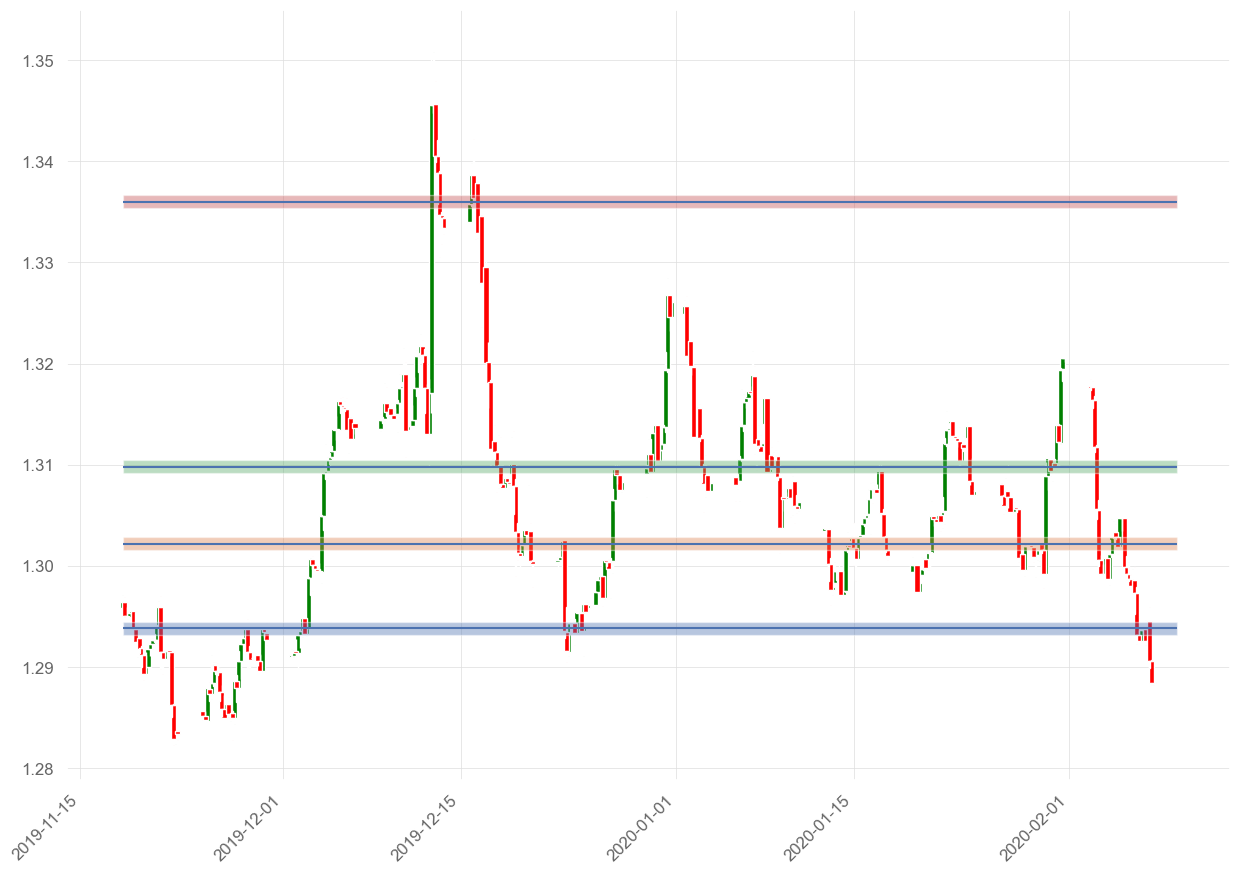

In [222]:
draw_candle_chart(sample_df, price_range_peaks, region = 0.0005)

### Create indicator from `VBT.IndicatorFactory` and `run` the pipeline

In [223]:
sr_indicator = vbt.IF(
    class_name='Support_Resistance',
    input_names = ['source_df'],
    param_names = ['peaks_range', 'num_peaks'],
    output_names = ['sr_prices']
).with_custom_func(support_resistance_func)

In [224]:
sr_price_zones = sr_indicator.run(source_df = h4_df, peaks_range = [2,4], num_peaks = -999)
sr_price_zones

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [225]:
def sr_custom_func(price_data : pd.Series, peaks_range : List = [2,4], num_peaks : int = -999) -> np.ndarray :
    """
    Creates support and resistance zones (areas) with bands on closing price data.
    Parameters
    ==========
    price_data  :   pd.Series, contining the OHLCV data of the instrument
    peaks_range :   List,  [min_peaks, max_peaks] to consider for the bandwidth
    num_peaks   :   int, nr. of peaks

    Returns
    =======
    sr_prices   :   np.ndarray, of support and resistance zones
    """
    ## Input parameters
    sample = price_data.to_numpy().flatten()

    maxima = argrelextrema(sample, np.greater)
    minima = argrelextrema (sample, np.less)

    extrema = np.concatenate((maxima, minima), axis=1)[0]
    extrema_prices = np.concatenate((sample[maxima], sample[minima]) )
    interval = extrema_prices[0]/10000

    bandwidth = interval

    while num_peaks < peaks_range[0] or num_peaks > peaks_range[1]:
        initial_price = extrema_prices[0]
        kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(extrema_prices.reshape(-1,1))
        a, b = min(extrema_prices), max(extrema_prices)
        price_range = np.linspace(a, b, 1000).reshape(-1,1)
        pdf = np.exp(kde.score_samples(price_range))
        peaks = find_peaks(pdf)[0]

        num_peaks = len (peaks)
        bandwidth += interval
        if bandwidth > 100*interval:
            print("Failed to converge, stopping...")
            break
    sr_prices = price_range[peaks]
    return sr_prices

In [226]:
type(h4_df["Close"])

pandas.core.series.Series

In [227]:
snr_indicator = vbt.IF(
    class_name='SnR',
    input_names = ['price_data'],
    param_names = ['peaks_range', 'num_peaks'],
    output_names = ['sr_prices']
).with_custom_func(sr_custom_func)

In [228]:
sr_prices = snr_indicator.run(price_data = h4_df["Close"], peaks_range = [2,4], num_peaks = -999)
sr_prices

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'